Setup env

In [19]:
from google.colab import drive
from os.path import join

ROOT = '/content/drive'     
PROJ = 'My Drive/approachML'   

drive.mount(ROOT) 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Supervised vs unsupervised

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [23]:
data = datasets.fetch_openml(
    'mnist_784',
    version=1,
    return_X_y=True
)
pixel_values, targets = data
target = targets.astype(int)

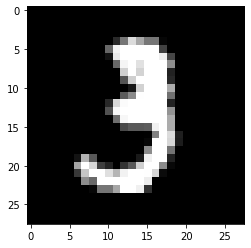

In [29]:
single_image = pixel_values[10, :].reshape(28, 28)
plt.imshow(single_image, cmap = 'gray')

In [30]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [42]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=["x", "y", "targets"]
)

tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

In [45]:
tsne_df

,x,y,targets
0,-5.28155,-28.9528,5
1,-26.1059,-68.0693,0
2,-42.5036,35.5804,4
3,38.894,26.6634,1
4,-14.7706,35.4332,9
...,...,...,...
2995,9.03811,58.8508,7
2996,-29.4053,-60.9518,0
2997,13.4664,47.369,9
2998,-2.43575,7.98377,1
